1 dataset: 波士顿房产
2 features: year, size and so on ..
3 target: 房价
4 model: Linear Regression, SVM


In [1]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

## 1 LinearRegression 

In [2]:
boston = datasets.load_boston()
y = boston.target

In [3]:
lr = linear_model.LinearRegression()

In [4]:
#查看数据结构
for key, value in boston.items():
    try:
        print(key, value.shape)
    except:
        print(key)

data (506, 13)
target (506,)
feature_names (13,)
DESCR


### cross_val_predict 

In [5]:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

In [9]:
#使用joblib.dump导出
from sklearn.externals import joblib
joblib.dump(lr, 'model/lr_boston.pkl')

['model/lr_boston.pkl']

In [10]:
#导出模型
model = joblib.load('model/lr_boston.pkl')

In [11]:
model.fit(boston.data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
predict_y = model.predict(boston.data[2])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### 绘制预测结果与实际目标差异 

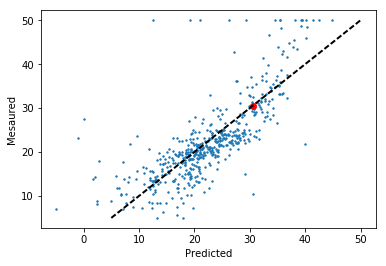

In [13]:
plt.scatter(predicted,y, s=2)
plt.plot(predict_y, predict_y, 'ro')
plt.plot([y.min(), y.max()], [y.min(),y.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("Mesaured")


## 2 SVR 

In [14]:
from sklearn.svm import SVR
X = boston.data
y = boston.target

In [15]:
clf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [16]:
clf.fit(X,y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
#导出模型
joblib.dump(clf, "model/svr_boston.pkl")

['model/svr_boston.pkl']

In [19]:
model2 = joblib.load("model/svr_boston.pkl")

In [20]:
model2.fit(X,y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
predict_y = model2.predict(X[2])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [22]:
predict = model2.predict(X)

In [23]:
model2.score(X,y)

0.99988275378631286

### 绘制预测结果与实际目标差异 

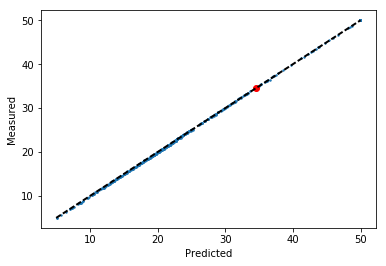

In [24]:
plt.scatter(predict, y, s=2)
plt.plot(predict_y, predict_y, 'ro')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("Measured")